In [1]:
import pandas as pd 
import numpy as np
import ast
import os
import sys
import seaborn as sns 
import matplotlib.pyplot as plt 

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [2]:
df = pd.read_csv('../data/raw/movies_metadata.csv', low_memory=False)

In [3]:
# First we explore the dataset
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.shape

(45466, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
# We start by fixing obvious data type issues  
df['budget'] = pd.to_numeric(df['budget'], errors = 'coerce')
df['id'] = df['id'].astype(str)
df['imdb_id'] = df['imdb_id'].astype(str)
df['original_language'] = df['original_language'].astype('category')
df['popularity'] = pd.to_numeric(df['popularity'], errors = 'coerce')
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors = 'coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors = 'coerce')
df['status'] = df['status'].astype('category')
df['title'] = df['title'].astype(str)
df['vote_average'] = pd.to_numeric(df['vote_average'], errors = 'coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors = 'coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45463 non-null  float64       
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  object        
 6   imdb_id                45466 non-null  object        
 7   original_language      45455 non-null  category      
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

In [8]:
# Let's look at the structure of columns like genres, production_companies and production_coutries.
df['genres'].iloc[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [9]:
# These columns contain stringified JSON objects. We convert them into usable lists with only the 'name' field.
# Import custom function from src.
from data_cleaning import process_column

In [10]:
df = process_column(df, 'genres', key_name = 'name')

In [11]:
df['genres'].iloc[0]

['Animation', 'Comedy', 'Family']

In [12]:
df = process_column(df, 'production_companies', key_name = 'name')
df = process_column(df, 'production_countries', key_name = 'name')

In [13]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [14]:
# Now let's filter the DataFrame to only keep potentially useful columns to the project and analysis.
columns_to_keep =['budget', 'genres', 'id', 'imdb_id', 'original_language', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'title']
df = df[columns_to_keep]

In [15]:
df.head()

,budget,genres,id,imdb_id,original_language,production_companies,production_countries,release_date,revenue,runtime,title
0,30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,Toy Story
1,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,Jumanji
2,0.0,"[Romance, Comedy]",15602,tt0113228,en,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,Grumpier Old Men
3,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,Waiting to Exhale
4,0.0,[Comedy],11862,tt0113041,en,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,Father of the Bride Part II


In [16]:
# We can start Data Cleaning
# Checking nulls
df.isnull().sum()

budget                    3
genres                    0
id                        0
imdb_id                   0
original_language        11
production_companies      3
production_countries      3
release_date             90
revenue                   6
runtime                 263
title                     0
dtype: int64

In [17]:
# Since missing data is minimal, we will impute most values wih median, and drop rows when appropriate not to introduce noise.
df['budget'] = df['budget'].fillna(df['budget'].median())
df.dropna(subset=['original_language'], inplace=True)
df.dropna(subset=['production_companies'], inplace=True)
df.dropna(subset=['production_countries'], inplace=True)
df.dropna(subset=['release_date'], inplace=True) # hard to impute dates reliably
df['revenue'] = df['revenue'].fillna(df['revenue'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

In [18]:
# Checking for duplicates in strategic columns
print(df['id'].duplicated().sum())
print(df['imdb_id'].duplicated().sum())
print(df['title'].duplicated().sum())

30
43
3180


In [19]:
df = df.drop_duplicates(subset=['id', 'imdb_id', 'title'])

In [20]:
# Checking for inconsistencies, incorrect or impossible values
print((df['budget'] <= 0).sum())
print((df['revenue'] <= 0).sum())
print((df['runtime'] <= 0).sum())
print((df['release_date'].dt.year > 2025).sum())
print((df['release_date'].dt.year < 1888).sum()) # Year of the first movie ever released

36459
37938
1534
0
4


In [21]:
# Filtering out rows with invalid budget, revenue, runtime, or release_date.
# Although this removes a significant portion of the dataset (~80%), it is a necessary step for accurate profitability analysis, 
# since zero or negative values in these columns would distort results.
# The remaining data is still large enough to support meaningful and reliable insights.
df_clean = df[(df['budget'] > 0) & (df['revenue'] > 0) & (df['runtime'] > 0) & (df['release_date'].dt.year > 1888)]

In [22]:
print(len(df))
print(len(df_clean))
# We still have 5364 rows of clean data.

45335
5364


In [23]:
# Checking for outliers.
df_clean.describe()

,budget,release_date,revenue,runtime
count,5.364000e+03,5364,5.364000e+03,5364.000000
mean,3.116394e+07,2000-04-12 05:31:32.617449600,9.056873e+07,110.058538
min,1.000000e+00,1915-02-08 00:00:00,1.000000e+00,26.000000
25%,5.200000e+06,1994-06-30 12:00:00,7.083172e+06,95.000000
50%,1.700000e+07,2004-11-07 00:00:00,3.000000e+07,106.000000
75%,4.000000e+07,2011-04-08 00:00:00,1.000000e+08,120.000000
max,3.800000e+08,2017-08-04 00:00:00,2.787965e+09,338.000000
std,4.020220e+07,NaN,1.663425e+08,21.499102


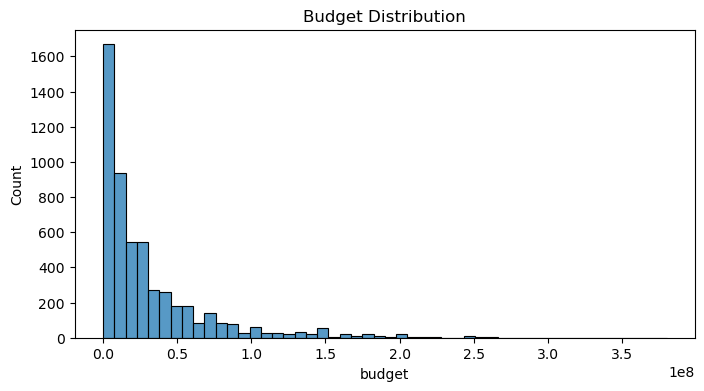

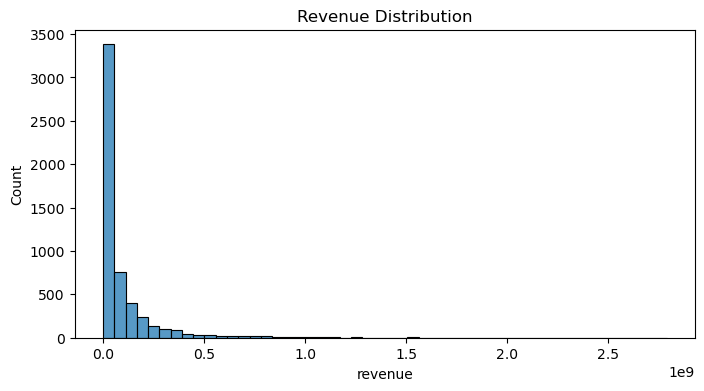

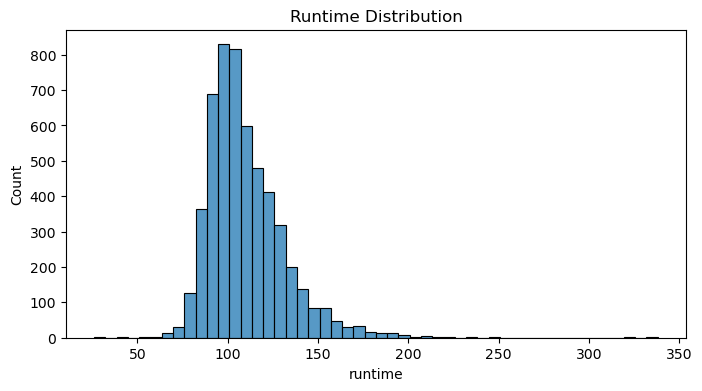

In [24]:
# We can see some suspicious values in budget, revenue, runtime. 
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['budget'], bins=50)
plt.title("Budget Distribution")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df_clean['revenue'], bins=50)
plt.title("Revenue Distribution")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df_clean['runtime'], bins=50)
plt.title("Runtime Distribution")
plt.show()

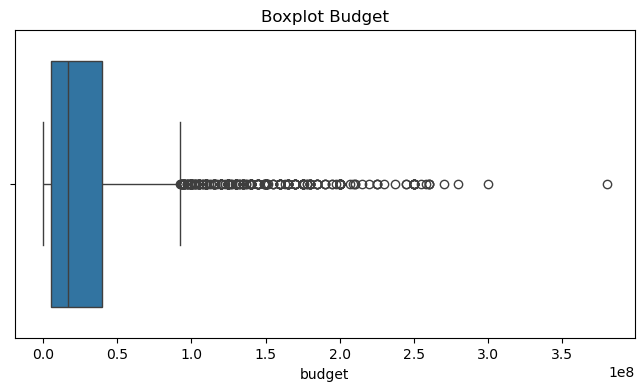

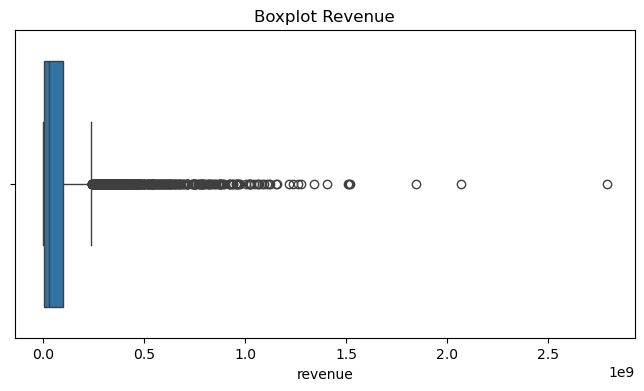

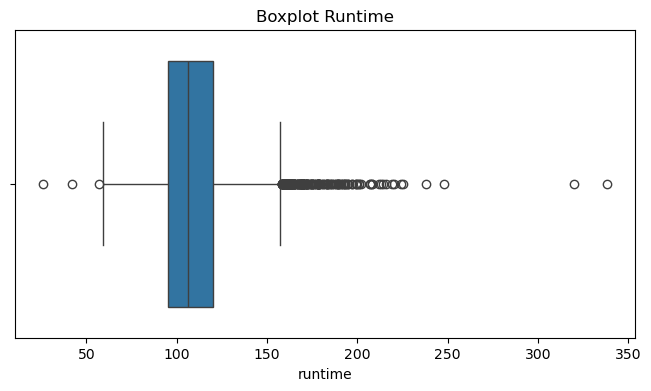

In [25]:
# We see right skew data for budget and revenue. Keep in mind to normalize later when we do the modeling.
# Now let's see boxplots.

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['budget'])
plt.title("Boxplot Budget")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['revenue'])
plt.title("Boxplot Revenue")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['runtime'])
plt.title("Boxplot Runtime")
plt.show()

In [26]:
# The boxplots confirm the presence of outliers in all three variables, particularly on the upper end for budget and revenue.
# However, instead of relying solely on statistical thresholds like IQR, 
# we will apply domain knowledge and manually inspect extreme values.

lowest_budgets = df_clean.sort_values('budget').head(10)
print(lowest_budgets)

highest_budgets = df_clean.sort_values('budget').tail(10)
print(highest_budgets)

       budget                   genres      id    imdb_id original_language  \
15873     1.0      [Romance, Thriller]   56969  tt0374271                hi   
4000      1.0  [Drama, Crime, Romance]   13703  tt0093407                en   
19258     1.0        [Comedy, Romance]   59296  tt1436559                en   
2483      1.0        [Comedy, Romance]   39964  tt0120836                en   
3342      1.0          [Drama, Comedy]    3082  tt0027977                en   
22278     1.0                 [Comedy]  114903  tt1695765                en   
35086     1.0                  [Drama]  218275  tt1445208                en   
38526     1.0          [Action, Drama]   49029  tt0376144                ta   
922       1.0                  [Drama]     220  tt0048028                en   
180       2.0      [Thriller, Foreign]   48787  tt0110604                en   

                                    production_companies  \
15873                                [People Tree Films]   
4000   [Tw

In [27]:
# Even though values near the minimum are not statistical outliers, it is not realistic for a studio-backed film to have 
# a budget of $1. They are probably data entry errors or placeholders.
# I will remove these values with a more realistic threshold of a minimum of 1,000 dollars for microbudget cinema.
# The highest budgets however are plausible and correspond to major productions and blockbusters.
# Removing them would not be appropriate.
df_clean = df_clean[df_clean['budget'] >= 1000]

In [28]:
# Now for revenue

lowest_revenues = df_clean.sort_values('revenue').head(10)
print(lowest_revenues)

highest_revenues = df_clean.sort_values('revenue').tail(10)
print(highest_revenues)

           budget                                             genres      id  \
13480    200000.0  [Adventure, Action, Comedy, Science Fiction, M...   14301   
34275    390000.0                                                 []  237214   
12946   4002313.0               [Action, Adventure, Comedy, Foreign]   38140   
2663    6400000.0                                [Thriller, Romance]   48781   
2882    2000000.0                                   [Romance, Drama]  108346   
8107   16000000.0                                    [Comedy, Drama]   18475   
7016   23000000.0                                  [Comedy, Romance]   14844   
17527  10000000.0                           [Crime, Drama, Thriller]   33927   
6736   12000000.0                                [Mystery, Thriller]   10944   
11653   2000000.0                                         [Thriller]   41393   

         imdb_id original_language  \
13480  tt1227926                en   
34275  tt3121604                en   
12946

In [29]:
# Just like with budget, the lowest revenue values are unrealistically small.
# I will apply the same minimum threshold of $1,000 to filter out these entries.
# The highest revenue values, on the other hand, align with blockbusters, and are therefore valid and will be kept.
df_clean = df_clean[df_clean['revenue'] >= 1000]

In [30]:
# Finally, runtime.

lowest_runtimes = df_clean.sort_values('runtime').head(10)
print(lowest_runtimes)

highest_runtimes = df_clean.sort_values('runtime').tail(10)
print(highest_runtimes)

           budget                                          genres      id  \
30932   3000000.0                             [Family, Animation]   14813   
39628     75000.0                                  [Crime, Drama]  173689   
8293      17311.0                                         [Drama]   70368   
18533    250000.0                                        [Comedy]   80379   
17469  30000000.0                             [Animation, Family]   51162   
1000     812000.0                             [Animation, Family]   11360   
41290   4500000.0  [Adventure, Animation, Comedy, Drama, Fantasy]   33534   
14176     88000.0                       [Horror, Science Fiction]   18724   
12730    259000.0                                [Drama, Mystery]   27506   
8345     200000.0                                        [Comedy]   43595   

         imdb_id original_language  \
30932  tt0085936                en   
39628  tt0019096                en   
8293   tt0005078                en   


In [31]:
# We observe unusual low and high runtimes.
# According to major industry standards 40 minutes is widely accepted as the minimum runtime,
# and 240 minutes ( 4 hours) is a reasonable upper limit to include long films but excluding errors. 
 
df_clean = df_clean[(df_clean['runtime'] >= 40) & (df_clean['runtime'] <= 240)]

In [32]:
df_clean.shape

(5293, 11)

In [33]:
# Now we can do some exploration of categorical data.
# Let's begin with the non-list-based categorical columns.

print(df_clean['original_language'].value_counts().head(10))
print(df_clean['original_language'].value_counts().tail(10))
# We see that it is mainly English, with a crushing majority.

original_language
en    4737
hi      95
fr      86
ru      65
es      38
ja      38
zh      29
it      27
ta      25
de      21
Name: count, dtype: int64
original_language
kk      0
ku      0
68.0    0
la      0
lb      0
lo      0
lt      0
lv      0
mk      0
zu      0
Name: count, dtype: int64


In [34]:
# Now for the list-based columns.
# We can see which genres are most and least common in our dataset.
# For that we will create a new version of our DataFrame for future use.
df_genres = df_clean.explode('genres')
print(df_genres['genres'].value_counts().head(10))
print(df_genres['genres'].value_counts().tail(10))

genres
Drama              2540
Comedy             1814
Thriller           1485
Action             1398
Romance             984
Adventure           950
Crime               848
Science Fiction     630
Horror              583
Family              526
Name: count, dtype: int64
genres
Fantasy        508
Mystery        440
Animation      289
History        232
War            201
Music          189
Western         89
Documentary     56
Foreign         28
TV Movie         1
Name: count, dtype: int64


In [35]:
# We can see that only 1 movie belongs to the 'TV Movie' genre. 
# It is not enough to conclude anything meaningful out of it and it might just add noise to our future analysis by genres.
# It might also not belong in a theatrical film analysis to begin with so I will remove it.

df_genres = df_genres[df_genres['genres'] != 'TV Movie']

In [36]:
# And the most and least common production_companies and production_countries
df_companies = df_clean.explode('production_companies')
print(df_companies['production_companies'].value_counts().head(10))
print(df_companies['production_companies'].value_counts().tail(10))

production_companies
Warner Bros.                              416
Universal Pictures                        385
Paramount Pictures                        335
Twentieth Century Fox Film Corporation    294
Columbia Pictures                         210
New Line Cinema                           174
Metro-Goldwyn-Mayer (MGM)                 162
Walt Disney Pictures                      132
Touchstone Pictures                       129
Columbia Pictures Corporation             116
Name: count, dtype: int64
production_companies
Departure Entertainment           1
Departure Studios                 1
Artist Film                       1
Above All Things Inc              1
Metro Tartan Distribution Ltd.    1
Minerva Picture Company Ltd.      1
Snowfall Films                    1
ShadowCatcher Entertainment       1
Daniel Bobker Productions         1
Acacia Filmed Entertainment       1
Name: count, dtype: int64


In [37]:
# Some companies have only made 1 film in our dataset. 
# For future analysis on production_companies, we will set a threshold of 5 movies minimum to remove noise and obscure companies.

companies_count = df_companies['production_companies'].value_counts()
valid_companies = companies_count[companies_count >= 5].index
df_companies = df_companies[df_companies['production_companies'].isin(valid_companies)]

In [38]:
df_countries = df_clean.explode('production_countries')
print(df_countries['production_countries'].value_counts().head(10))
print(df_countries['production_countries'].value_counts().tail(10))

production_countries
United States of America    4341
United Kingdom               657
France                       365
Germany                      313
Canada                       232
India                        174
Australia                    119
Italy                        107
Japan                         87
Russia                        80
Name: count, dtype: int64
production_countries
Angola        1
Botswana      1
Lithuania     1
Kazakhstan    1
Mali          1
Ecuador       1
Paraguay      1
Uruguay       1
Costa Rica    1
Malaysia      1
Name: count, dtype: int64


In [39]:
# We will do the same thing as for production_companies and set a threshold of 5 movies minimum.

countries_count = df_countries['production_countries'].value_counts()
valid_countries = countries_count[countries_count >= 5].index
df_countries = df_countries[df_countries['production_countries'].isin(valid_countries)]

In [40]:
# Now for THE essential part of the project, we will add a 'profit' column and a 'ROI' column to each DataFrame we plan to use
# that are relevant to the project. 
df_clean['profit'] = df_clean['revenue'] - df_clean['budget']
df_clean['roi'] = df_clean['profit'] / df_clean['budget']

df_genres['profit'] = df_genres['revenue'] - df_genres['budget']
df_genres['roi'] = df_genres['profit'] / df_genres['budget']

df_companies['profit'] = df_companies['revenue'] - df_companies['budget']
df_companies['roi'] = df_companies['profit'] / df_companies['budget']

df_countries['profit'] = df_countries['revenue'] - df_countries['budget']
df_countries['roi'] = df_countries['profit'] / df_countries['budget']

In [43]:
# The dataset is now fully cleaned and prepared.
# We are ready to begin analysis and explore our business questions.
# We will save our DataFrames to files to continue the analysis in a separate notebook.
# We are saving each DataFrame in 2 formats:
# - Pickle to preserve the exact structure including lists and data types for Python analysis.
# - CSV to make data compatible with potential external tools.

In [42]:
# Pickle format (for Python)
df_clean.to_pickle("../data/processed/df_clean.pkl")
df_genres.to_pickle("../data/processed/df_genres.pkl")
df_companies.to_pickle("../data/processed/df_companies.pkl")
df_countries.to_pickle("../data/processed/df_countries.pkl")

# CSV format (for external tools)
df_clean.to_csv("../data/processed/df_clean.csv", index=False)
df_genres.to_csv("../data/processed/df_genres.csv", index=False)
df_companies.to_csv("../data/processed/df_companies.csv", index=False)
df_countries.to_csv("../data/processed/df_countries.csv", index=False)